La predicció per l'hora 25 (l'endemà) és: 50.83 µg/m³


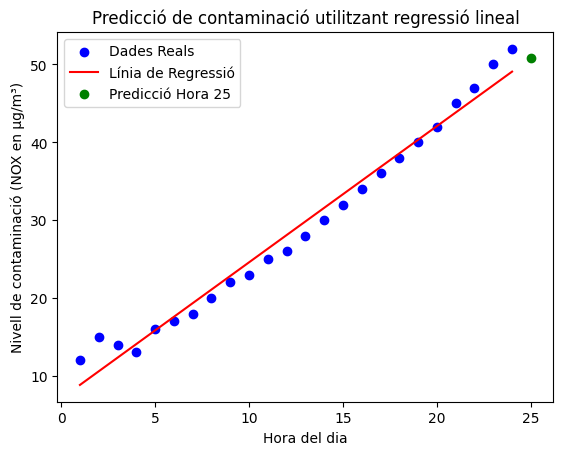

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Dades hardcodejades per a un contaminant NOX per a les hores 1 a 24 (en µg/m³)
dades_hardcodejades = {
    "hora": [i for i in range(1, 25)],  # Hores de 1 a 24
    "NOX": [12, 15, 14, 13, 16, 17, 18, 20, 22, 23, 25, 26, 28, 30, 32, 34, 36, 38, 40, 42, 45, 47, 50, 52]  # Nivells de NOX
}

# Convertir les dades en arrays de Numpy per facilitar els càlculs
hores = np.array(dades_hardcodejades["hora"]).reshape(-1, 1)  # Reshape per a que sigui compatible amb el model
nox_values = np.array(dades_hardcodejades["NOX"])

# Entrenament del model de regressió lineal
model = LinearRegression()
model.fit(hores, nox_values)

# Fer la predicció per a les hores 25 a 48 (l'endemà)
hores_endemà = np.array([i for i in range(25, 49)]).reshape(-1, 1)  # Hores de 25 a 48 (l'endemà)
prediccio_resultats_endemà = model.predict(hores_endemà)

# Mostrar la predicció per a l'endemà (hores 25-48)
for hora, prediccio in zip(range(25, 49), prediccio_resultats_endemà):
    print(f"La predicció per l'hora {hora} de l'endemà és: {prediccio:.2f} µg/m³")

# Visualització de les dades, la línia de regressió i les prediccions per l'endemà
plt.scatter(hores, nox_values, color='blue', label='Dades Reals')
plt.plot(hores, model.predict(hores), color='red', label='Línia de Regressió')

# Afegir les prediccions de l'endemà
plt.plot(hores_endemà, prediccio_resultats_endemà, color='green', linestyle='dashed', label='Predicció de l\'endemà')

# Etiquetes i títol
plt.xlabel('Hora del dia')
plt.ylabel('Nivell de contaminació (NOX en µg/m³)')
plt.title('Predicció de contaminació utilitzant regressió lineal')
plt.legend()

# Mostrar gràfic
plt.show()
